## Fourier transform of a geometric progression

If we are given the following geometric progression function:
\begin{equation}
y(k) = R^{-k}
\end{equation}


G before shift: [1.99951172+0.00000000e+00j 1.4762666 -6.50925783e-01j
 0.99975586-5.77209315e-01j 0.79980469-3.99902344e-01j
 0.71411133-2.47375421e-01j 0.67705371-1.18117185e-01j
 0.66650391-2.74469180e-17j 0.67705371+1.18117185e-01j
 0.71411133+2.47375421e-01j 0.79980469+3.99902344e-01j
 0.99975586+5.77209315e-01j 1.4762666 +6.50925783e-01j]
0
1
2
3
4
5
-6
-5
-4
-3
-2
-1
G after shift: [1.99951172+0.00000000e+00j 1.4762666 -6.50925783e-01j
 0.99975586-5.77209315e-01j 0.79980469-3.99902344e-01j
 0.71411133-2.47375421e-01j 0.67705371-1.18117185e-01j
 0.66650391-2.74469180e-17j 0.67705371+1.18117185e-01j
 0.71411133+2.47375421e-01j 0.79980469+3.99902344e-01j
 0.99975586+5.77209315e-01j 1.4762666 +6.50925783e-01j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


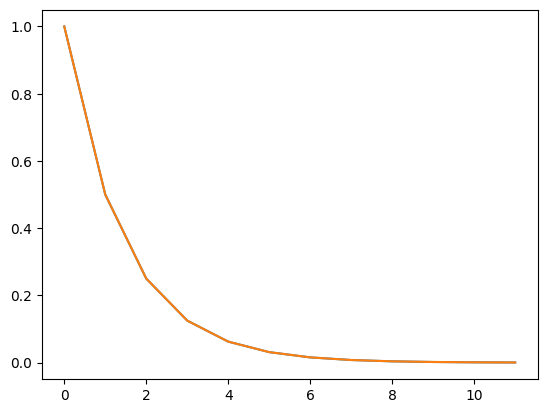

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import math

R = 2

fig, ax = plt.subplots()


def y_l(A):
    out = np.zeros(len(A))
    for i in range(0, len(A)):
        out[i] = R**-A[i]
    return out


def g(k, N):
    return np.exp(-2j * np.pi * k / N) * R**-1

N = 3
y = np.linspace(0,N-1,N)
y_l_y = y_l(y)

# Plot original function
ax.plot(y,y_l_y)

# Calculate Fourier transform of the Geometric progression function: y(k) = 2^-k
G = np.zeros(N, dtype=complex)
for i in range(0,N):
    G[i] = (1 - g(i,N)**N) / (1 - g(i,N))
    
    
# for i in range()
    
print("G before shift:",G)

def wave_num(i):
    return (i + math.floor(N/2))%N - math.floor(N/2)
    # return (i + (math.floor(N/2)% N) - math.floor(N/2))

delta = 0.5
# Multiply the frequency values by a phase shift of delta
for k in range(0,N):
    e = np.exp(-2j * np.pi * k * delta)/N

    
print("G after shift:", G)
    
    
out_inverse = np.zeros(N, dtype=complex)
# Implement my own inverse fourier
# for m in range(0,N):
#     for k in range(0,N):
#         e = np.exp(2j * np.pi * k * m/ N)
#         out_inverse[m] += G[k] * e
        
#     out_inverse[m] = out_inverse[m] / N
# out_inverse/= N
    
    
print(out_inverse)
# print(G)
out_inverse = np.fft.ifft(G)

# print(new_g)
# final_output = np.fft.ifft(new_g)
# print(final_output)
ax.plot(y, out_inverse.real)

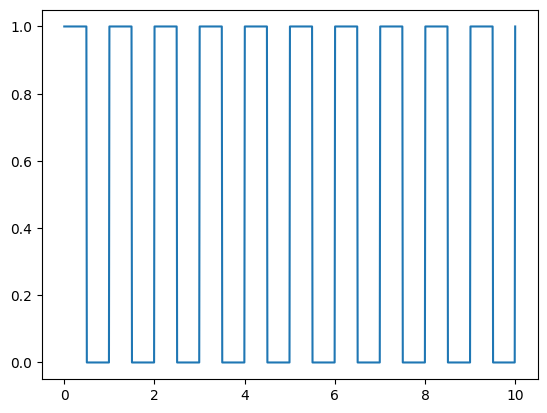

In [255]:
# Square wave
import math

x = np.linspace(0, 10, 1000)
y = np.array([1 if math.floor(2 * t) % 2 == 0 else 0 for t in x])

plt.plot(x,y)

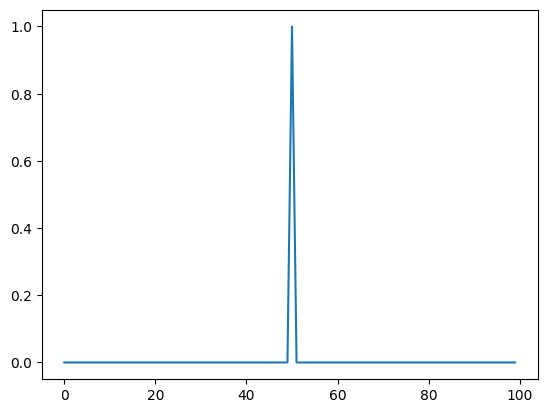

In [196]:
# Bomba function
def f(A):
    out = np.zeros(len(A))
    for i in range(0, len(A)):
        if i == len(A)/2:
            out[i] = 1
    return out

N = 100
y = np.linspace(0,N-1, N)
f_y = f(y)

fig, ax = plt.subplots()

ax.plot(y,f_y)
